U prethodnom primeru koristili smo gradient descent algoritam koji je radio dobro u slučaju našeg jednostavnog problema. Međutim, u slučaju kompleksnijih modela poželjno je koristiti šeme optimizacije koje pružaju bržu konvergenciju prilikom treninga modela. 

In [2]:
import torch.optim as optim

In [ ]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [4]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)
# SGD - stochastic gradient descent

SGD je u suštini običan gradient descent algoritam u slučaju kada je parametar momentum podešen na vrednost 0.0, što je predefinisani slučaj. 

Pojam stohastički dolazi zbog činjenice da se gradijent tipično izračunava usrednjavanjem slučajno izabranog podskupa koji se naziva još i minibatch.

Momentum predstavlja prošienje SGD algoritma koje omogućava pretrazi da uključi inerciju u pravcu spuštanja i time prevaziđe oscilacije gradijenata preko ravnih delova prostora za pretragu. Prednost u odnosu na osnovni SGD je brža konvergencija i mogućnost izlaska iz lokalnog minimuma kako bi se dostigao globalni minimum. 

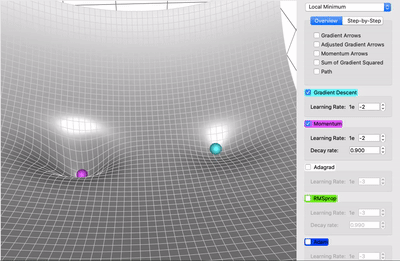

Ilustracija: https://paperswithcode.com/method/sgd-with-momentum

In [5]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [ ]:
def model(t_u, w, b):
    return w * t_u + b

In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step() # Performs a single optimization step (parameter update)
params

tensor([ 0.4111, -0.0108], requires_grad=True)

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([1.7761, 0.1064], requires_grad=True)

In [ ]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  if epoch % 500 == 0:
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
n_epochs = 5000,
optimizer = optimizer,
params = params,
t_u = t_un,
t_c = t_c)

Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(
n_epochs = 2000,
optimizer = optimizer,
params = params,
t_u = t_u,
t_c = t_c)

Epoch 2000, Loss 2.927644


tensor([  0.5367, -17.3021], requires_grad=True)